In [1]:
import pandas as pd

# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('knnattempt3.csv')
print(df.head())  # This will show the first few rows of your data


                   geoLocation       neighbourhoodGeoLocation  \
0  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
1  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
2  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
3  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
4  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   

   neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  \
0                0        2.0            2.0              0       3.0   
1                0        2.0            2.0              0       2.0   
2                0        2.0            2.0              0       2.0   
3                0        2.0            2.0              0       2.0   
4                0        2.0            2.0              0       3.0   

   datePosted  livingArea  price  ...  COMMON_ASSAULT_Count  crime_scoreID  \
0  2023-09-12  1,315 sqft   2050  ...                   102              0   
1  2023-09-18 

In [6]:
def g(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print(f"{col} has {df[col].isnull().sum()} missing values")

result = g(df.copy())
print(result)

bathrooms has 1 missing values
bathroomsFull has 15 missing values
bedrooms has 3 missing values
datePosted has 92 missing values
livingArea has 288 missing values
rentEstimate has 32 missing values
Stories has 2130 missing values
yearBuilt has 1421 missing values
None


In [7]:
# Columns to be dropped
columns_to_drop = ['datePosted', 'livingArea', 'rentEstimate', 'Stories', 'yearBuilt']

# Dropping the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check the DataFrame after dropping the columns
print(df.head())


                   geoLocation       neighbourhoodGeoLocation  \
0  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
1  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
2  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
3  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
4  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   

   neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  price  \
0                0        2.0            2.0              0       3.0   2050   
1                0        2.0            2.0              0       2.0   1740   
2                0        2.0            2.0              0       2.0   1850   
3                0        2.0            2.0              0       2.0   1940   
4                0        2.0            2.0              0       3.0   2050   

   propertyID  neighbourhoodID.1  ...  COMMON_ASSAULT_Count  crime_scoreID  \
0  2062003721                  0  ...             

In [8]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['geoLocation', 'neighbourhoodGeoLocation', 'Cooling', 'Heating',
       'Parking', 'Pets'],
      dtype='object')


In [9]:
# Display the first few rows of the geoLocation and neighbourhoodGeoLocation columns
print(df[['geoLocation', 'neighbourhoodGeoLocation']].head())


                   geoLocation       neighbourhoodGeoLocation
0  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)
1  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)
2  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)
3  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)
4  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)


In [10]:
# Function to extract latitude and longitude from the POINT format
def extract_lat_long(point):
    # Extracting the inside of the parentheses and splitting by space
    lat, long = point.replace('POINT (', '').replace(')', '').split()
    return float(lat), float(long)

# Apply the function to the geoLocation column
df['geoLocation_lat'], df['geoLocation_long'] = zip(*df['geoLocation'].apply(extract_lat_long))

# Apply the function to the neighbourhoodGeoLocation column
df['neighbourhoodGeoLocation_lat'], df['neighbourhoodGeoLocation_long'] = zip(*df['neighbourhoodGeoLocation'].apply(extract_lat_long))

# Check the first few rows of the DataFrame
print(df.head())

                   geoLocation       neighbourhoodGeoLocation  \
0  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
1  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
2  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
3  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   
4  POINT (39.37203 -76.685295)  POINT (39.370859 -76.6701475)   

   neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  price  \
0                0        2.0            2.0              0       3.0   2050   
1                0        2.0            2.0              0       2.0   1740   
2                0        2.0            2.0              0       2.0   1850   
3                0        2.0            2.0              0       2.0   1940   
4                0        2.0            2.0              0       3.0   2050   

   propertyID  neighbourhoodID.1  ...  LARCENY_FROM_AUTO_Count  \
0  2062003721                  0  ...                      388

In [11]:
# Columns to be dropped
columns_to_drop = ['geoLocation', 'neighbourhoodGeoLocation']

# Dropping the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check the DataFrame after dropping the columns
print(df.head())

   neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  price  \
0                0        2.0            2.0              0       3.0   2050   
1                0        2.0            2.0              0       2.0   1740   
2                0        2.0            2.0              0       2.0   1850   
3                0        2.0            2.0              0       2.0   1940   
4                0        2.0            2.0              0       3.0   2050   

   propertyID  neighbourhoodID.1  CableAvailable  Clubhouse  ...  \
0  2062003721                  0               1          0  ...   
1  2067797682                  0               1          0  ...   
2  2071152602                  0               1          0  ...   
3  2072105027                  0               1          0  ...   
4  2075119575                  0               1          0  ...   

  LARCENY_FROM_AUTO_Count  overallCrimeScore  RAPE_Count  \
0                     388            3.69216      

In [12]:
# Columns to be one-hot encoded
one_hot_cols = ['Cooling', 'Heating', 'Parking', 'Pets']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=one_hot_cols)

# Check the resulting DataFrame
print(df_encoded.head())


   neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  price  \
0                0        2.0            2.0              0       3.0   2050   
1                0        2.0            2.0              0       2.0   1740   
2                0        2.0            2.0              0       2.0   1850   
3                0        2.0            2.0              0       2.0   1940   
4                0        2.0            2.0              0       3.0   2050   

   propertyID  neighbourhoodID.1  CableAvailable  Clubhouse  ...  \
0  2062003721                  0               1          0  ...   
1  2067797682                  0               1          0  ...   
2  2071152602                  0               1          0  ...   
3  2072105027                  0               1          0  ...   
4  2075119575                  0               1          0  ...   

   Parking_On-street  Parking_Parking Lot  Pets_0  Pets_Cats  \
0                  0                    0     

C:\Users\nicky\AppData\Local\Temp\ipykernel_6380\2872875553.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


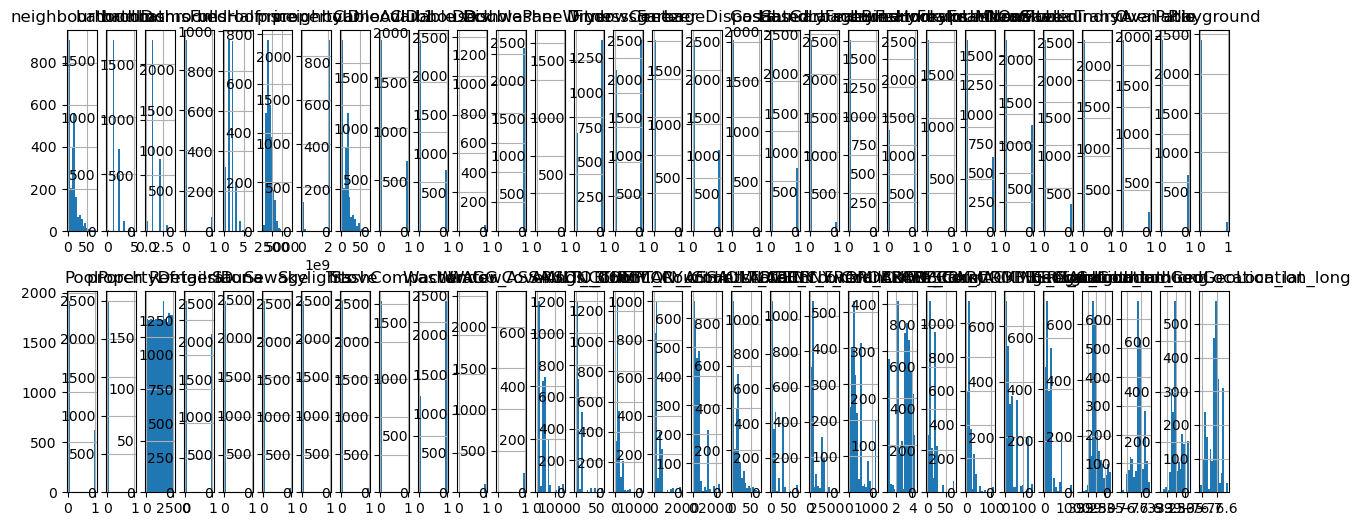

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for each numerical feature
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, -1))
plt.tight_layout()
plt.show()


In [14]:
# Display summary statistics for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
summary_statistics = df[numerical_cols].describe()
print(summary_statistics)


       neighbourhoodID    bathrooms  bathroomsFull  bathroomsHalf  \
count      2540.000000  2539.000000    2525.000000    2540.000000   
mean         12.685433     1.389917       1.286733       0.067323   
std          11.699663     0.638279       0.598600       0.250630   
min           0.000000     0.000000       0.000000       0.000000   
25%           3.000000     1.000000       1.000000       0.000000   
50%          11.000000     1.000000       1.000000       0.000000   
75%          18.000000     2.000000       2.000000       0.000000   
max          72.000000     5.000000       4.000000       1.000000   

          bedrooms        price    propertyID  neighbourhoodID.1  \
count  2537.000000  2540.000000  2.540000e+03        2540.000000   
mean      1.519905  1848.105906  1.790256e+09          12.685433   
std       0.938832   708.766064  6.968745e+08          11.699663   
min       0.000000   375.000000  3.642889e+07           0.000000   
25%       1.000000  1345.000000  2.056

In [15]:
# Calculate skewness and kurtosis
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurtosis()
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Skewness:
 neighbourhoodID                   1.508096
bathrooms                         1.713525
bathroomsFull                     1.165560
bathroomsHalf                     3.455443
bedrooms                          0.533236
price                             1.202807
propertyID                       -2.091632
neighbourhoodID.1                 1.508096
CableAvailable                    1.052122
Clubhouse                         1.212225
Deck                              5.482132
Dishwasher                        0.040978
DoublePaneWindows                25.154499
Dryer                            -0.678886
FitnessCenter                    -0.173985
Freezer                           9.737280
garbageDisposal                   0.889836
Gas                              12.487614
Gated                             1.174915
HasGarbageBin                     4.466782
LaundryFeaturesHookups           10.611138
LaundryFeaturesInUnit            -0.653062
LaundryFeaturesNone              13.878661


In [16]:
# Columns for latitude and longitude
lat_long_cols = ['geoLocation_lat', 'geoLocation_long', 'neighbourhoodGeoLocation_lat', 'neighbourhoodGeoLocation_long']

# Other numerical columns
other_numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in lat_long_cols]


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the non-lat-long numerical columns
df_scaled = df.copy()
df_scaled[other_numerical_cols] = scaler.fit_transform(df[other_numerical_cols])


In [18]:
# Combine the scaled and unscaled columns
df_final = df_scaled.copy()
df_final[lat_long_cols] = df[lat_long_cols]


In [22]:

print(df_final.head())


   neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  \
0              0.0        0.4            0.5            0.0  0.428571   
1              0.0        0.4            0.5            0.0  0.285714   
2              0.0        0.4            0.5            0.0  0.285714   
3              0.0        0.4            0.5            0.0  0.285714   
4              0.0        0.4            0.5            0.0  0.428571   

      price  propertyID  neighbourhoodID.1  CableAvailable  Clubhouse  ...  \
0  0.252830    0.967151                0.0             1.0        0.0  ...   
1  0.206038    0.969917                0.0             1.0        0.0  ...   
2  0.222642    0.971519                0.0             1.0        0.0  ...   
3  0.236226    0.971974                0.0             1.0        0.0  ...   
4  0.252830    0.973413                0.0             1.0        0.0  ...   

  LARCENY_FROM_AUTO_Count  overallCrimeScore  RAPE_Count  \
0                0.321192       

In [23]:
# List all column names
column_names = df.columns.tolist()
print(column_names)


['neighbourhoodID', 'bathrooms', 'bathroomsFull', 'bathroomsHalf', 'bedrooms', 'price', 'propertyID', 'neighbourhoodID.1', 'CableAvailable', 'Clubhouse', 'Cooling', 'Deck', 'Dishwasher', 'DoublePaneWindows', 'Dryer', 'FitnessCenter', 'Freezer', 'garbageDisposal', 'Gas', 'Gated', 'HasGarbageBin', 'Heating', 'LaundryFeaturesHookups', 'LaundryFeaturesInUnit', 'LaundryFeaturesNone', 'LaundryFeaturesShared', 'Microwave', 'NearPublicTransit', 'OnSiteLaundryAvailable', 'Oven', 'Parking', 'Patio', 'Pets', 'Playground', 'Pool', 'Porch', 'propertyDetailsID', 'Refrigerator', 'Sauna', 'Sewage', 'Skylights', 'Stove', 'TrashCompactor', 'Washer', 'Water', 'WindowCoverings', 'AGG_ASSAULT_Count', 'ARSON_Count', 'AUTO_THEFT_Count', 'BURGLARY_Count', 'COMMON_ASSAULT_Count', 'crime_scoreID', 'HOMICIDE_Count', 'LARCENY_Count', 'LARCENY_FROM_AUTO_Count', 'overallCrimeScore', 'RAPE_Count', 'ROBBERY_CARJACKING_Count', 'ROBBERY_COMMERCIAL_Count', 'ROBBERY_Count', 'geoLocation_lat', 'geoLocation_long', 'neighbo

In [25]:
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)



Categorical columns: Index(['Cooling', 'Heating', 'Parking', 'Pets'], dtype='object')


In [26]:
df_final_encoded = pd.get_dummies(df_final, columns=categorical_cols)


In [27]:
knn = NearestNeighbors(n_neighbors=10)
knn.fit(df_final_encoded)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [28]:
# Check for NaN values
nan_columns = df_final_encoded.columns[df_final_encoded.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)


Columns with NaN values: ['bathrooms', 'bathroomsFull', 'bedrooms']


In [29]:
# Calculate the percentage of NaN values in each column
nan_percentage = df_final_encoded.isnull().mean() * 100

# Display the percentage of NaN values in each column
print(nan_percentage)


neighbourhoodID          0.000000
bathrooms                0.039370
bathroomsFull            0.590551
bathroomsHalf            0.000000
bedrooms                 0.118110
                           ...   
Pets_Cats, Small Dogs    0.000000
Pets_Dogs, Small Dogs    0.000000
Pets_No Pets             0.000000
Pets_None                0.000000
Pets_Small Dogs          0.000000
Length: 137, dtype: float64


In [30]:
for col in ['bathrooms', 'bathroomsFull']:
    df_final_encoded[col].fillna(df_final_encoded[col].median(), inplace=True)


In [31]:
df_final_encoded.dropna(subset=['bedrooms'], inplace=True)


In [32]:
assert not df_final_encoded.isna().any().any(), "DataFrame still contains NaNs"


In [33]:
knn = NearestNeighbors(n_neighbors=10)
knn.fit(df_final_encoded)

NearestNeighbors(n_neighbors=10)

In [34]:
# Randomly select a property
test_index = np.random.choice(df_final_encoded.index)
test_property = df_final_encoded.loc[test_index].values.reshape(1, -1)


NameError: name 'np' is not defined

In [37]:
# Randomly select a property index
test_index = np.random.choice(df_final_encoded.index)

# Retrieve the property as a DataFrame with the same column names
test_property = df_final_encoded.loc[[test_index]]

# Find the nearest neighbors
distances, indices = knn.kneighbors(test_property)


In [38]:
recommended_indices = indices.flatten()
recommended_properties = df.iloc[recommended_indices]



In [39]:
# Print the recommended properties
print(recommended_properties)



      neighbourhoodID  bathrooms  bathroomsFull  bathroomsHalf  bedrooms  \
696                 3        1.0            0.0              0       1.0   
2198               23        1.0            1.0              0       2.0   
695                 3        1.0            0.0              0       2.0   
1181               10        1.0            0.0              0       1.0   
951                 5        1.0            0.0              0       1.0   
2361               22        1.0            1.0              0       2.0   
2183               22        1.0            1.0              0       2.0   
2389               35        2.0            2.0              0       4.0   
954                 5        1.0            0.0              0       1.0   
1482               11        1.0            0.0              0       2.0   

      price  propertyID  neighbourhoodID.1  CableAvailable  Clubhouse  ...  \
696    1550  2055543639                  3               0          0  ...   
2198   